Actividad 1. Filtrado de la imagen

Fátima Álvarez Nuño - A01645815

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


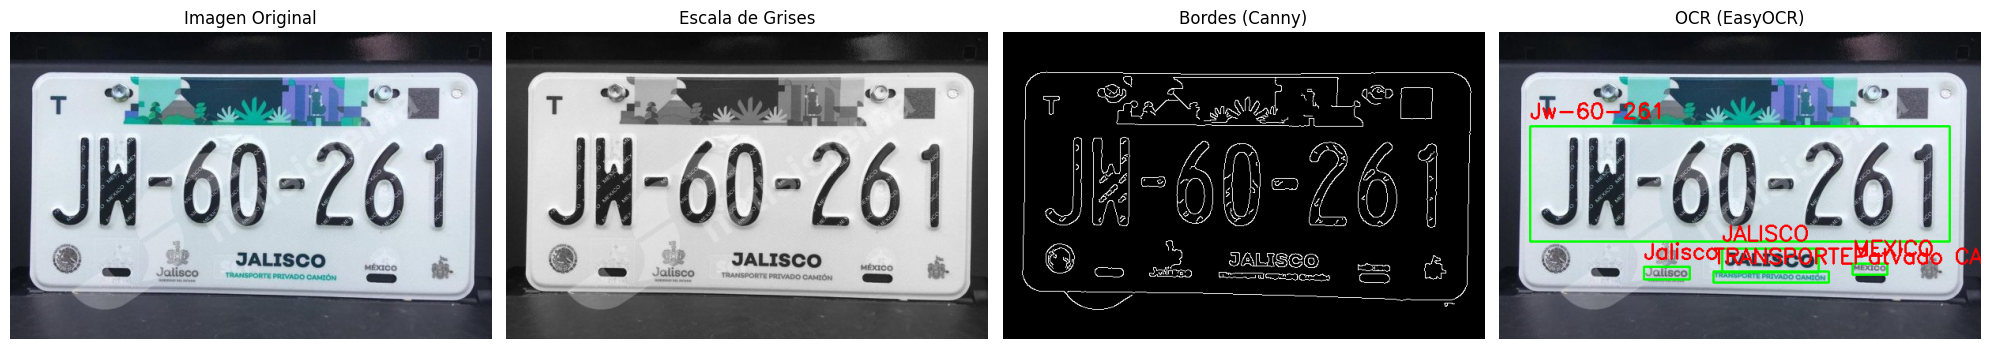


Textos detectados:
Texto: 'Jw-60-261'
Texto: 'JALISCO'
Texto: 'MEXICO'
Texto: 'Jalisco'
Texto: 'TRANSPORTEPatVado CAMION'


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

# Cargar la imagen
imagen = cv2.imread("placa3.jpg")
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Convertir a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Suavizado con filtro Gaussiano
gris_suavizado = cv2.GaussianBlur(gris, (5, 5), 0)

# Detección de bordes (Canny)
bordes = cv2.Canny(gris_suavizado, 100, 200)

# OCR con EasyOCR
reader = easyocr.Reader(['es', 'en'])  # Soporte para español e inglés
resultados = reader.readtext(imagen)

# Dibujar los textos detectados sobre la imagen original
imagen_ocr = imagen_rgb.copy()

for bbox, texto, conf in resultados:
    (tl, tr, br, bl) = bbox
    tl = tuple(map(int, tl))
    br = tuple(map(int, br))
    cv2.rectangle(imagen_ocr, tl, br, (0, 255, 0), 2)
    cv2.putText(imagen_ocr, texto, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Mostrar todas las imágenes
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

axs[0].imshow(imagen_rgb)
axs[0].set_title('Imagen Original')
axs[0].axis('off')

axs[1].imshow(gris, cmap='gray')
axs[1].set_title('Escala de Grises')
axs[1].axis('off')

axs[2].imshow(bordes, cmap='gray')
axs[2].set_title('Bordes (Canny)')
axs[2].axis('off')

axs[3].imshow(imagen_ocr)
axs[3].set_title('OCR (EasyOCR)')
axs[3].axis('off')

plt.tight_layout()
plt.show()

# Imprimir los textos detectados en consola
print("\nTextos detectados:")
for bbox, texto, conf in resultados:
    print(f"Texto: '{texto}'")